In [2]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
import bff
# import pingouin as pg
#import researchpy
# Plotting packages
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

In [3]:
df = pd.read_excel("data63.xlsx")
df

,ResponseId,Country,cond,condName,Intervention_order,Belief1,Belief2,Belief3,Belief4,Policy1,...,Edu,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total,WEPTcc,BELIEFcc,POLICYcc
0,R_1r7Yr7R1xMimIvj,Usa,5,CollectAction,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,98.0,77.0,86.0,93.0,71.0,...,3.0,5.0,"2,4,5",7.0,80.0,6.056,95.501,1,88.50,89.000000
1,R_2ATgV5VxewrTRiI,Usa,1,Control,PolicySupport|BeliefinAnthrCC|Socialmediashari...,49.0,50.0,51.0,51.0,1.0,...,3.0,4.0,"1,2,3,4,5,6,7",5.0,51.0,16.284,200.742,0,50.25,66.222222
2,R_3ENlePBlLyYjExr,Usa,9,LetterFutureGen,SocialmediasharingPipedText|PolicySupport|Beli...,87.0,82.0,84.0,83.0,84.0,...,3.0,5.0,"1,2,3,6,7",8.0,73.0,5.701,218.442,1,84.00,84.222222
3,R_2c0HQgvYzas6mus,Usa,4,SciConsens,PolicySupport|SocialmediasharingPipedText|Beli...,1.0,1.0,0.0,0.0,1.0,...,3.0,5.0,"1,2,3,4,5,6,7",4.0,1.0,13.282,12.702,0,0.50,1.222222
4,R_00siryCwgdMus6J,Usa,8,PluralIgnorance,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,56.0,59.0,61.0,54.0,79.0,...,3.0,5.0,"1,3,5,6,7",7.0,65.0,8.474,19.315,0,57.50,80.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59435,R_2TuXye2HP6EO5KZ,Vietnam,11,FutureSelfCont,PolicySupport|SocialmediasharingPipedText|Beli...,49.0,100.0,100.0,74.0,70.0,...,3.0,2.0,"1,2,3,4,5,6,7",7.0,60.0,27.732,873.538,0,80.75,82.500000
59436,R_3R3p8C0gzLKTcCu,Vietnam,12,BindingMoral,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,94.0,98.0,98.0,96.0,92.0,...,3.0,2.0,"1,2,4,6,7",3.0,74.0,49.502,0.000,0,96.50,86.444444
59437,R_OeT1JV3yC1aJ4EF,Vietnam,8,PluralIgnorance,SocialmediasharingPipedText|PolicySupport|Beli...,100.0,100.0,100.0,100.0,80.0,...,3.0,1.0,"2,4,5,6,7",6.0,100.0,7.920,89.072,7,100.00,83.333333
59438,R_2azVf0KXD3rtly8,Vietnam,3,NegativeEmotions,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,79.0,51.0,78.0,51.0,0.0,...,3.0,NaN,"1,2,3,4,5,6,7",7.0,100.0,40.222,398.193,8,64.75,66.666667


In [4]:
# Global median split
# df["Ideology"] = (df["Politics2_1"] > df["Politics2_1"].median()).astype(int)

df['ide'] = (df['Politics2_1'] + df['Politics2_9'])/2
# Per-country median split
new = []
for _, sub in df.groupby("Country"):
    sub.loc[:, "Ideology"] = (sub.loc[:, "ide"] > sub.loc[:, "ide"].median()).astype(float)
    # Ensure NaN ideology when Politics2_1 is NaN
    sub.loc[sub.Politics2_1.isna(), "Ideology"] = np.NaN
    new.append(sub)
df = pd.concat(new)
# Replace 1 with "Conservative" and 0 with "Liberal"
df['Ideology'] = df['Ideology'].replace(1, 'Conservative').replace(0, 'Liberal')
df_control = df.query('cond==1')
df_control

,ResponseId,Country,cond,condName,Intervention_order,Belief1,Belief2,Belief3,Belief4,Policy1,...,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total,WEPTcc,BELIEFcc,POLICYcc,ide,Ideology
5061,R_3ndh8CRntlGPnch,Algeria,1,Control,SocialmediasharingPipedText|PolicySupport|Beli...,29.0,32.0,31.0,28.0,31.0,...,"1,2,4,5,6,7",7.0,49.0,5.306,106.759,8,30.00,38.111111,50.0,Liberal
5072,R_3HM8bOnE6bQLcPs,Algeria,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,14.0,23.0,8.0,46.0,84.0,...,"1,2,4,5,6,7",6.0,77.0,49.231,345.303,8,22.75,89.888889,15.0,Liberal
5083,R_1GP0L143l7yV8M1,Algeria,1,Control,PolicySupport|SocialmediasharingPipedText|Beli...,100.0,100.0,53.0,61.0,50.0,...,5,5.0,40.0,22.657,345.559,7,78.50,61.111111,56.0,Liberal
5087,R_3ISScDiQQ7KxFvK,Algeria,1,Control,BeliefinAnthrCC|PolicySupport|Socialmediashari...,18.0,13.0,15.0,14.0,82.0,...,"1,2,4,6,7",8.0,13.0,18.616,174.585,4,15.00,65.333333,14.0,Liberal
5100,R_21ng6VSaDWS2muh,Algeria,1,Control,BeliefinAnthrCC|PolicySupport|Socialmediashari...,49.0,100.0,100.0,49.0,40.0,...,"1,2,4,5,6,7",5.0,77.0,28.108,290.542,8,74.50,76.666667,NaN,Liberal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59399,R_1db1dsU9anX3Iwf,Vietnam,1,Control,PolicySupport|BeliefinAnthrCC|Socialmediashari...,72.0,100.0,100.0,100.0,50.0,...,"1,2,4,5,6,7",7.0,80.0,5.195,189.709,8,93.00,82.888889,10.5,Liberal
59416,R_3PFQCv3jEvnT5RD,Vietnam,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,92.0,95.0,94.0,93.0,76.0,...,"1,2,3,4,5,6,7",7.0,90.0,11.888,206.495,8,93.50,79.222222,47.0,Liberal
59417,R_2Qgs8q8dUPLjhcA,Vietnam,1,Control,PolicySupport|SocialmediasharingPipedText|Beli...,89.0,100.0,100.0,100.0,35.0,...,NaN,NaN,NaN,6.190,166.433,2,97.25,71.111111,6.5,Liberal
59433,R_3GwXA80Oate9obo,Vietnam,1,Control,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,100.0,100.0,100.0,100.0,100.0,...,"1,2,3,4,5,6,7",4.0,100.0,4.966,42.906,4,100.00,100.000000,100.0,Conservative


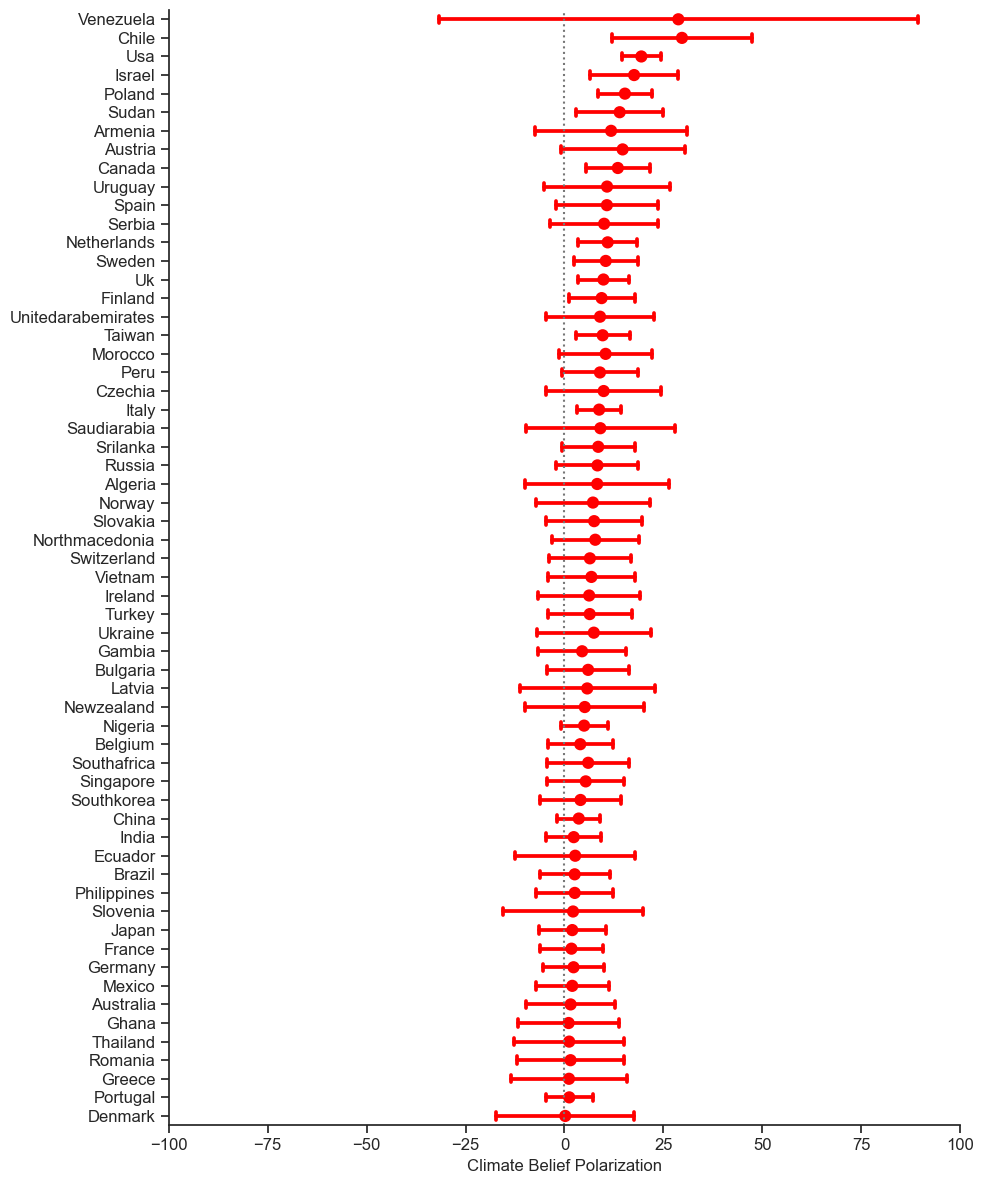

In [17]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["BELIEFcc"].mean())
        var.append(subgroup["BELIEFcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "BELIEFcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="BELIEFcc", ascending=False)
dfdiff["absdifference"] = dfdiff["BELIEFcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)

pal = ["#FF0000"]
fig, ax = plt.subplots(1,1, figsize=(10,12))
dupe = 250
dfCopy = dfdiff.loc[dfdiff.index.repeat(dupe)].copy()
dfCopy["absdifference"] = np.random.normal(dfCopy["absdifference"].values, dfCopy["err"].values)
sns.pointplot(y=dfCopy.Country, x=dfCopy.absdifference, errorbar="sd", orient="h", \
            palette = pal, join=False, capsize=.4,\
            ax=ax)
sns.despine()
plt.axvline(x=0, c="#777777", ls=":")
ax.set_ylabel("")
ax.set_xlabel("Climate Belief Polarization")
plt.xlim(-100,100)
plt.tight_layout()
plt.savefig('S1.pdf', dpi=500, format="pdf")

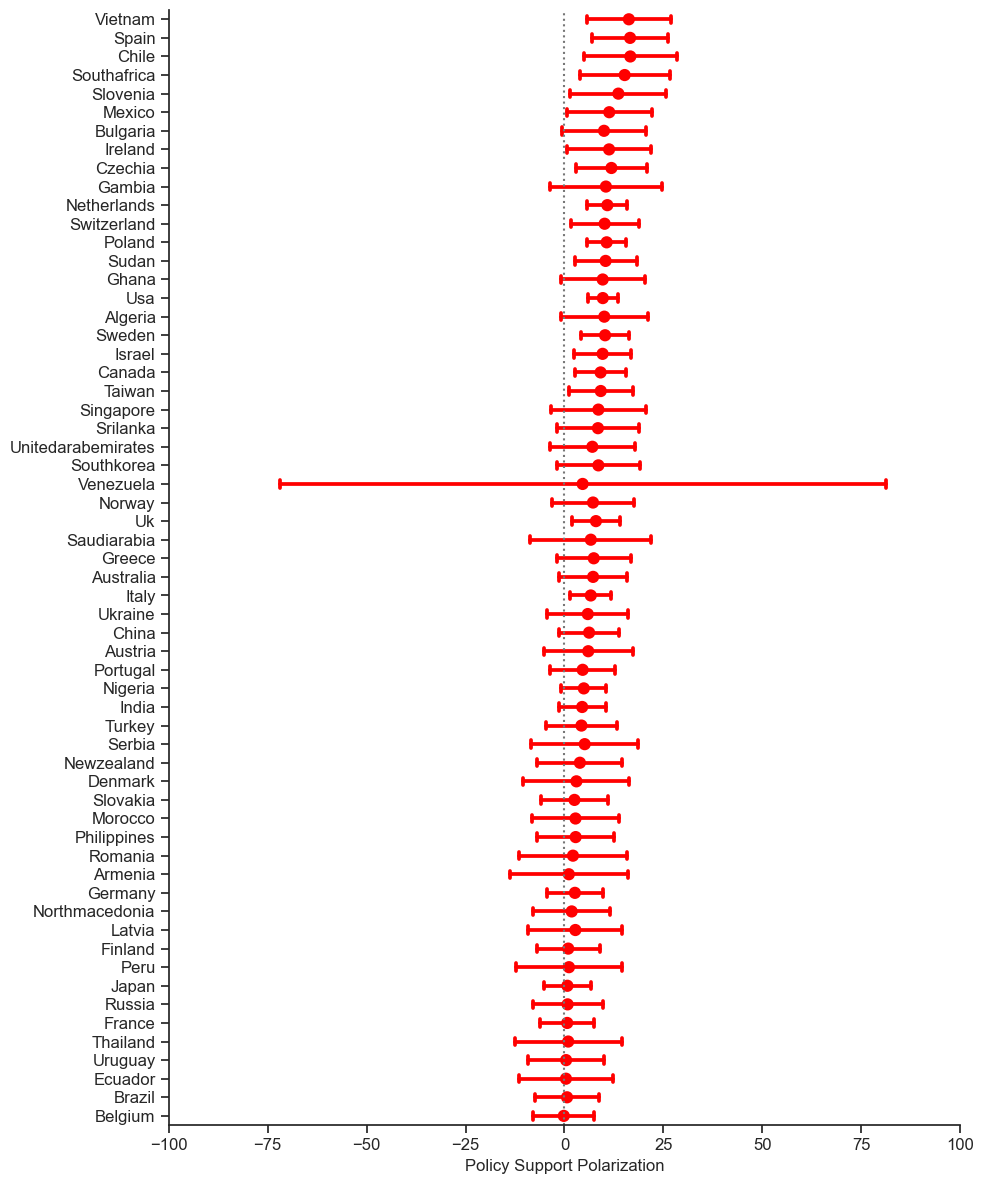

In [16]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["POLICYcc"].mean())
        var.append(subgroup["POLICYcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "POLICYcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="POLICYcc", ascending=False)
dfdiff["absdifference"] = dfdiff["POLICYcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)


pal = ["#FF0000"]
fig, ax = plt.subplots(1,1, figsize=(10,12))
dupe = 250
dfCopy = dfdiff.loc[dfdiff.index.repeat(dupe)].copy()
dfCopy["absdifference"] = np.random.normal(dfCopy["absdifference"].values, dfCopy["err"].values)
sns.pointplot(y=dfCopy.Country, x=dfCopy.absdifference, errorbar="sd", orient="h", \
            palette = pal, join=False, capsize=.4,\
            ax=ax)
sns.despine()
plt.axvline(x=0, c="#777777", ls=":")
ax.set_ylabel("")
ax.set_xlabel("Policy Support Polarization")
plt.xlim(-100,100)
plt.tight_layout()
plt.savefig('S2.pdf', dpi=500, format="pdf")

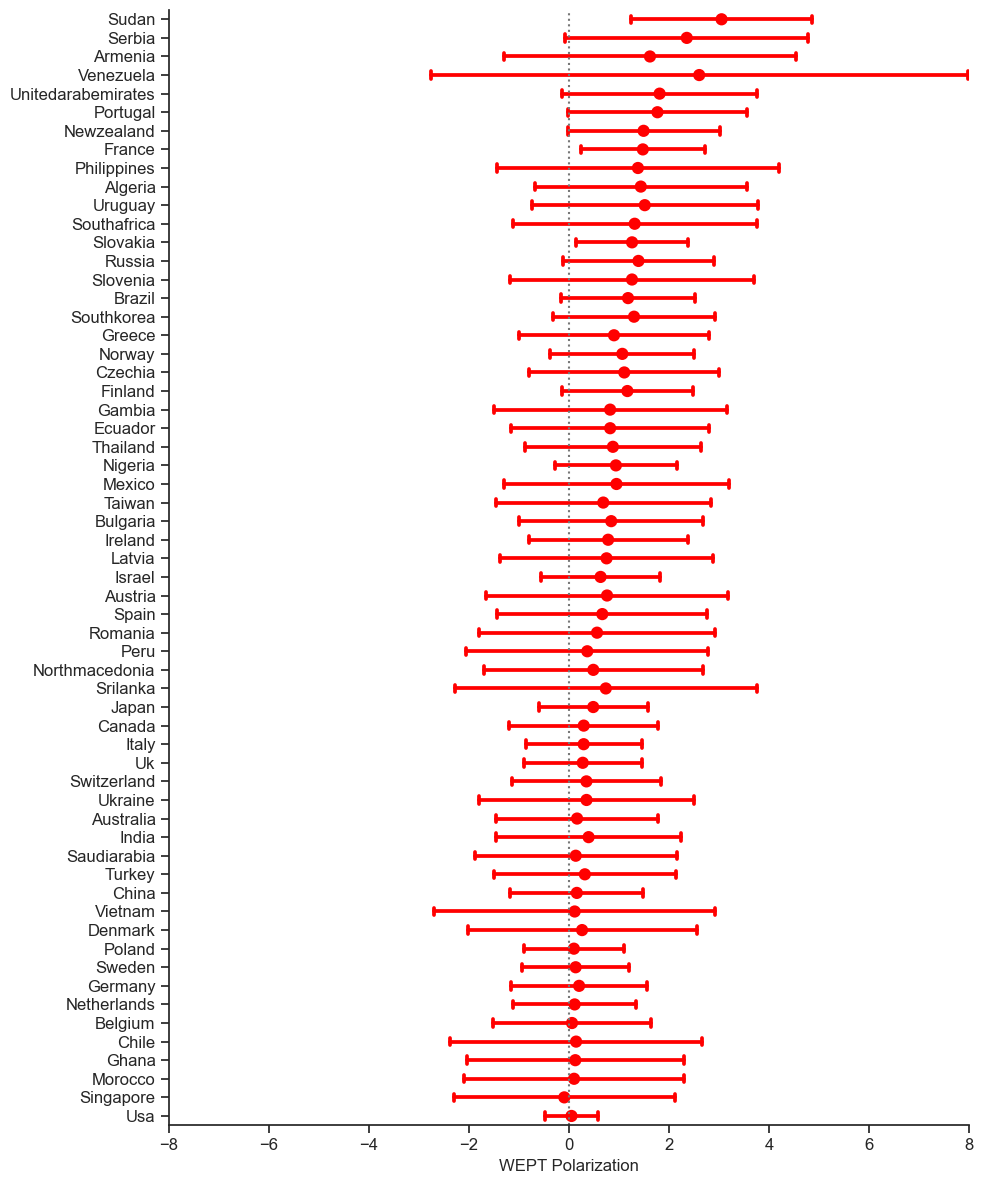

In [18]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["WEPTcc"].mean())
        var.append(subgroup["WEPTcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "WEPTcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="WEPTcc", ascending=False)
dfdiff["absdifference"] = dfdiff["WEPTcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)


pal = ["#FF0000"]
fig, ax = plt.subplots(1,1, figsize=(10,12))
dupe = 250
dfCopy = dfdiff.loc[dfdiff.index.repeat(dupe)].copy()
dfCopy["absdifference"] = np.random.normal(dfCopy["absdifference"].values, dfCopy["err"].values)
sns.pointplot(y=dfCopy.Country, x=dfCopy.absdifference, errorbar="sd", orient="h", \
            palette = pal, join=False, capsize=.4,\
            ax=ax)
sns.despine()
plt.axvline(x=0, c="#777777", ls=":")
ax.set_ylabel("")
ax.set_xlabel("WEPT Polarization")
plt.xlim(-8,8)
plt.tight_layout()
plt.savefig('S3.pdf', dpi=500, format="pdf")

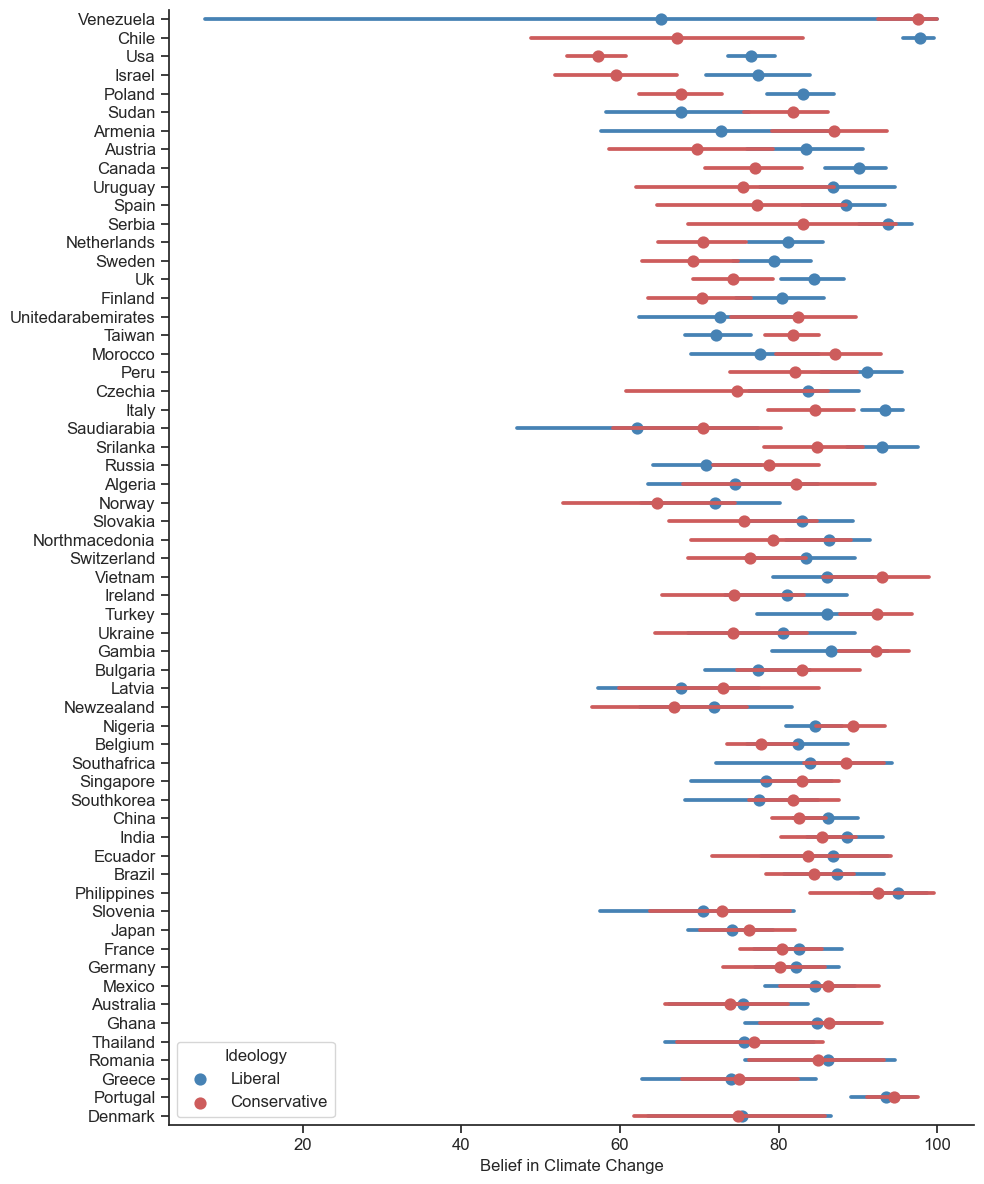

In [19]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["BELIEFcc"].mean())
        var.append(subgroup["BELIEFcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "BELIEFcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="BELIEFcc", ascending=False)
dfdiff["absdifference"] = dfdiff["BELIEFcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)

pal = ["#4682B4", '#CD5C5C']
fig, ax = plt.subplots(1,1, figsize=(10,12), sharey=True)
order = dfdiff.sort_values(by=['absdifference'], ascending=False).Country.tolist()

sns.pointplot(y=df_control.Country, x=df_control.BELIEFcc, hue=df_control.Ideology, data=df_control, orient="h", \
            palette = pal, join=False, order=order, \
            ax=ax)
sns.despine()
ax.set_ylabel("")
ax.set_xlabel("Belief in Climate Change")
plt.tight_layout()
plt.savefig('S4.pdf', dpi=500, format="pdf")

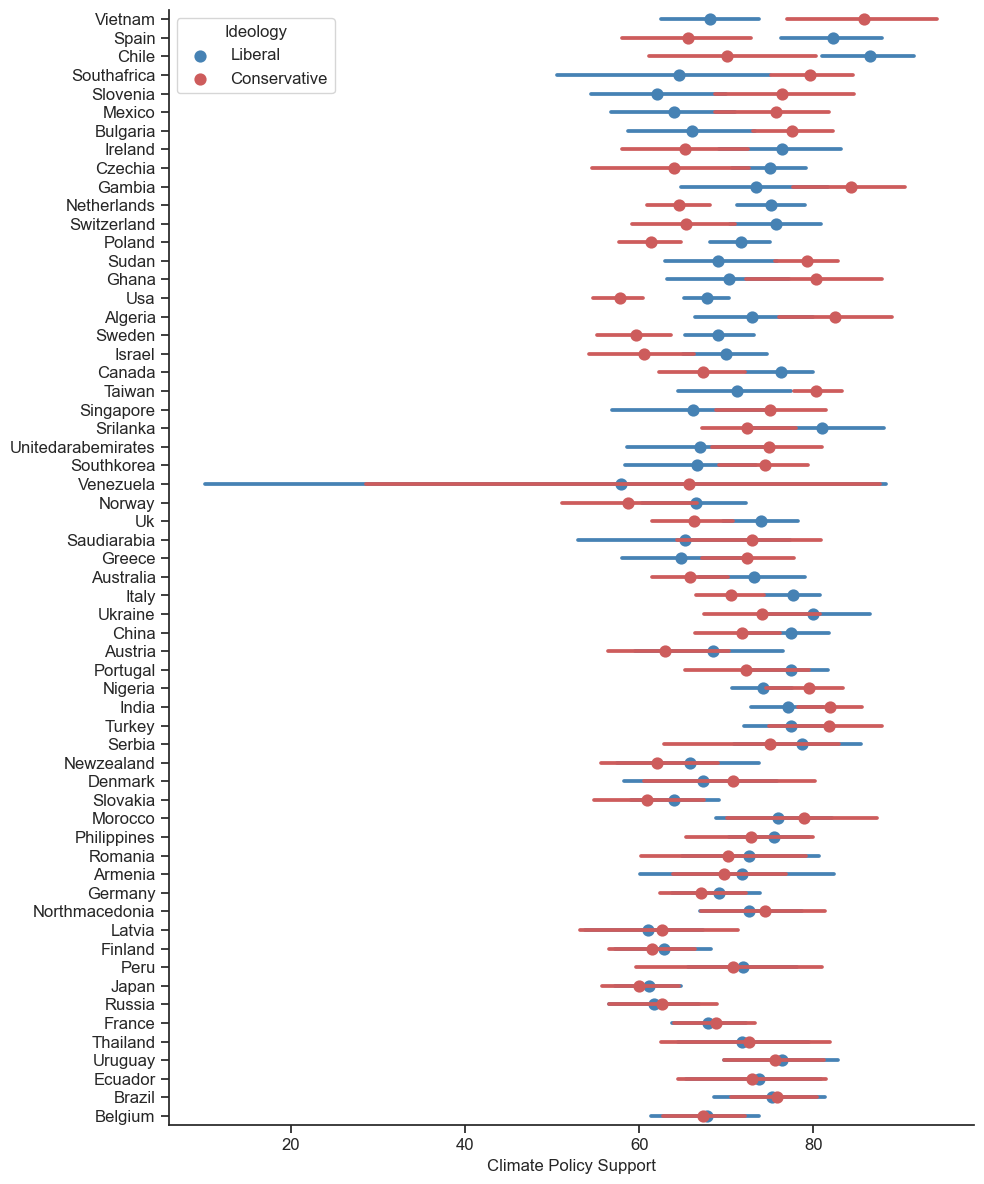

In [20]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["POLICYcc"].mean())
        var.append(subgroup["POLICYcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "POLICYcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="POLICYcc", ascending=False)
dfdiff["absdifference"] = dfdiff["POLICYcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)

pal = ["#4682B4", '#CD5C5C']
fig, ax = plt.subplots(1,1, figsize=(10,12), sharey=True)
order = dfdiff.sort_values(by=['absdifference'], ascending=False).Country.tolist()

sns.pointplot(y=df_control.Country, x=df_control.POLICYcc, hue=df_control.Ideology, data=df_control, orient="h", \
            palette = pal, join=False, order=order, \
            ax=ax)
sns.despine()
ax.set_ylabel("")
ax.set_xlabel("Climate Policy Support")
plt.tight_layout()
plt.savefig('S5.pdf', dpi=500, format="pdf")

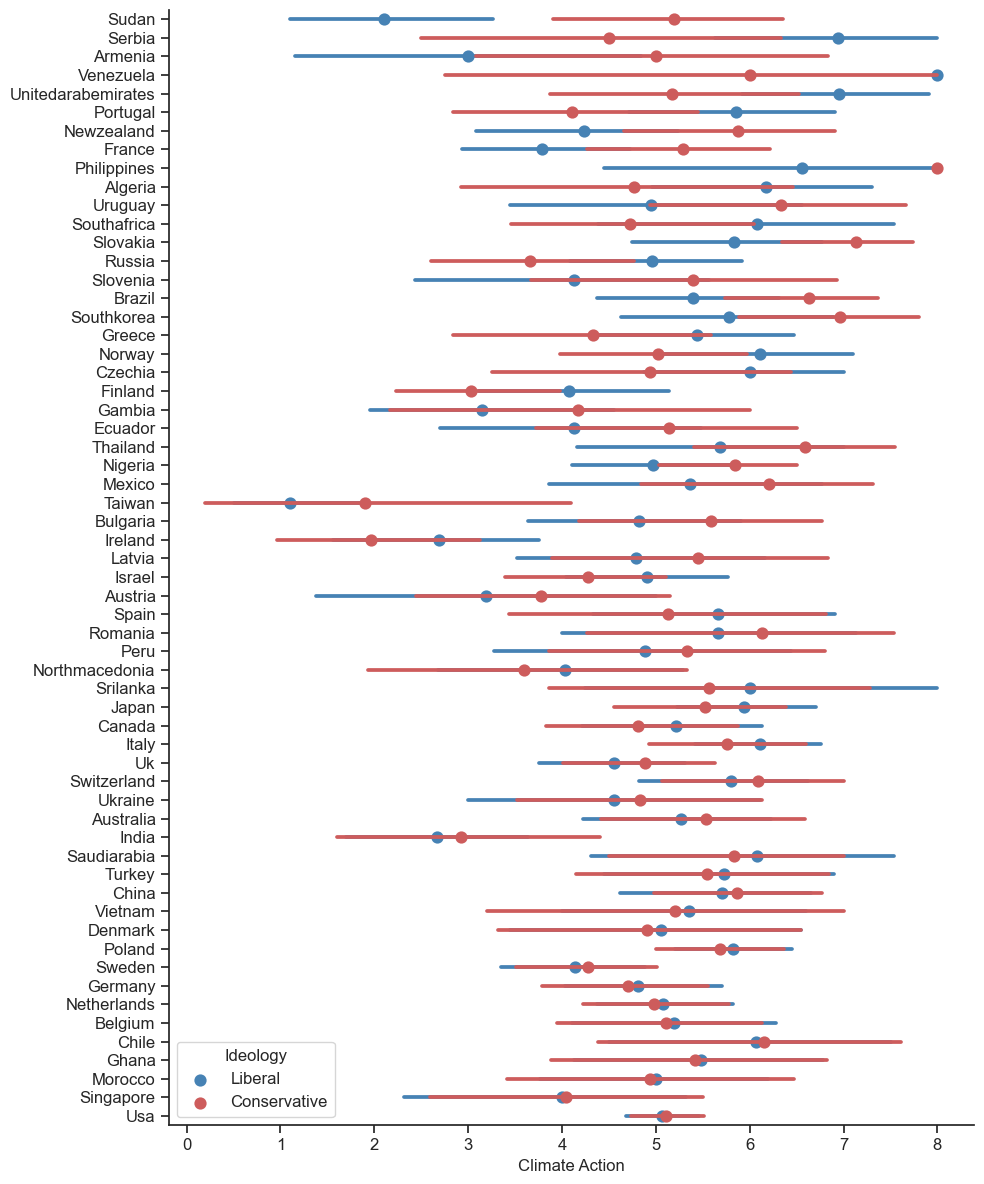

In [21]:
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["WEPTcc"].mean())
        var.append(subgroup["WEPTcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "WEPTcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="WEPTcc", ascending=False)
dfdiff["absdifference"] = dfdiff["WEPTcc"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)

pal = ["#4682B4", '#CD5C5C']
fig, ax = plt.subplots(1,1, figsize=(10,12), sharey=True)
order = dfdiff.sort_values(by=['absdifference'], ascending=False).Country.tolist()

sns.pointplot(y=df_control.Country, x=df_control.WEPTcc, hue=df_control.Ideology, data=df_control, orient="h", \
            palette = pal, join=False, order=order, \
            ax=ax)
sns.despine()
ax.set_ylabel("")
ax.set_xlabel("Climate Action")
plt.tight_layout()
plt.savefig('S6.pdf', dpi=500, format="pdf")

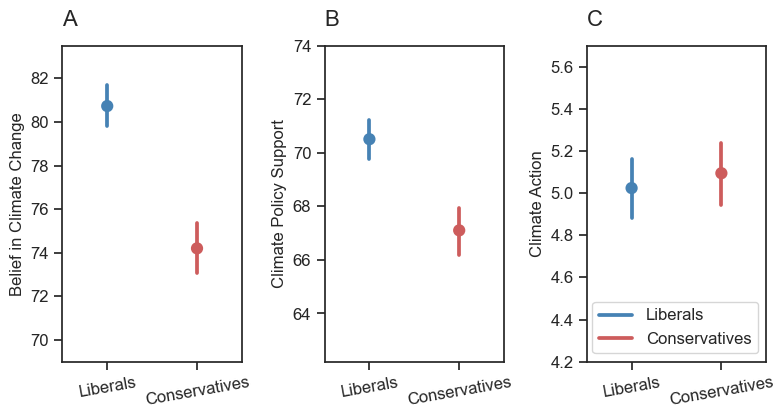

In [22]:
colors = ["#4682B4", '#CD5C5C']
fig, ax = plt.subplots(1,3, figsize=(8,4.35))

sns.pointplot(x="Ideology", y="BELIEFcc", data=df_control, palette=colors, ax=ax[0]) 
sns.pointplot(x="Ideology", y="POLICYcc", data=df_control, palette=colors, ax=ax[1]) 
sns.pointplot(x="Ideology", y="WEPTcc", data=df_control, palette=colors, ax=ax[2]) 

ax[0].set_ylabel('Belief in Climate Change')
ax[1].set_ylabel('Climate Policy Support')
ax[2].set_ylabel('Climate Action')

ax[0].set_xticklabels(['Liberals', 'Conservatives'], rotation=10)
ax[1].set_xticklabels(['Liberals', 'Conservatives'], rotation=10)
ax[2].set_xticklabels(['Liberals', 'Conservatives'], rotation=10)

ax[0].set_ylim(69,83.5)
ax[1].set_ylim(62.2,74)
ax[2].set_ylim(4.2,5.7)

bff.panellabel(ax[0], "A")
bff.panellabel(ax[1], "B")
bff.panellabel(ax[2], "C")

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')

plt.legend(['Liberals', 'Conservatives'], loc='lower right')

plt.tight_layout()
plt.savefig('S7.pdf', dpi=500, format="pdf")